# Prototyping a Data Filtering Pipeline
## Prerequisites

In [1]:
import glob
import pandas as pd
import mmproteo
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-v6lvo5t3 because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

## Data Import

In [3]:
pwd

'/tf/workspace/notebooks'

In [4]:
PROJECT = "PXD010000"
DATA_PATH = f"../datasets/{PROJECT}"
DUMP_PATH = f"../dumps/{PROJECT}"
TRAINING_COLUMNS_DUMP_PATH = DUMP_PATH + "/training_columns"
MZMLID_FILES_PATH = f"{DATA_PATH}/*_mzmlid.parquet"

In [5]:
mmproteo.utils.utils.ensure_dir_exists(TRAINING_COLUMNS_DUMP_PATH)

In [6]:
MZMLID_FILE_PATHS = glob.glob(MZMLID_FILES_PATH)
MZMLID_FILE_PATHS

['../datasets/PXD010000/Biodiversity_A_cryptum_FeTSB_anaerobic_1_01Jun16_Pippin_16-03-39_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_A_tumefaciens_R2A_aerobic_1_23Nov16_Pippin_16-09-11_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_cereus_ATCC14579_LB_aerobic_2_17July16_Samwise_16-04-10_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_cereus_PN_L_CL_1_09Oct16_Pippin_16-05-06_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_cereus_ATCC14579_LB_aerobic_1_17July16_Samwise_16-04-10_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_bifidum_CMcarb_anaerobic_03_26Feb16_Arwen_16-01-01_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_A_tumefaciens_R2A_aerobic_2_23Nov16_Pippin_16-09-11_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_A_faecalis_LB_aerobic_01_26Feb16_Arwen_16-01-01_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_bifidum_CMcarb_anaerobic_02_26Feb16_Arwen_16-01-01_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_bifidu

In [7]:
ls ../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06*

../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06.mzML
../datasets/PXD010000/Biodiversity_M_smegmatis_BHI_aerobic_3_05Oct16_Pippin_16-05-06_msgfplus.mzid


In [8]:
MZMLID_FILE_PATHS

['../datasets/PXD010000/Biodiversity_A_cryptum_FeTSB_anaerobic_1_01Jun16_Pippin_16-03-39_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_A_tumefaciens_R2A_aerobic_1_23Nov16_Pippin_16-09-11_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_cereus_ATCC14579_LB_aerobic_2_17July16_Samwise_16-04-10_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_cereus_PN_L_CL_1_09Oct16_Pippin_16-05-06_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_cereus_ATCC14579_LB_aerobic_1_17July16_Samwise_16-04-10_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_bifidum_CMcarb_anaerobic_03_26Feb16_Arwen_16-01-01_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_A_tumefaciens_R2A_aerobic_2_23Nov16_Pippin_16-09-11_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_A_faecalis_LB_aerobic_01_26Feb16_Arwen_16-01-01_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_bifidum_CMcarb_anaerobic_02_26Feb16_Arwen_16-01-01_mzmlid.parquet',
 '../datasets/PXD010000/Biodiversity_B_bifidu

In [9]:
len(MZMLID_FILE_PATHS)

17

In [10]:
# for testing
MZMLID_FILE_PATHS = MZMLID_FILE_PATHS[:1]

In [11]:
current_input_file_path = MZMLID_FILE_PATHS[0]

In [12]:
df = pd.read_parquet(current_input_file_path)

## Data Description

In [13]:
df.drop(columns=['mz_array', 'intensity_array']).head()

,index,id,defaultArrayLength,MS1_spectrum,ms_level,positive_scan,centroid_spectrum,base_peak_mz,base_peak_intensity,total_ion_current,lowest_observed_mz,highest_observed_mz,count,scanList__count,scanList__no_combination,scanList__scan__scan_start_time,scanList__scan__filter_string,scanList__scan__preset_scan_configuration,scanList__scan__ion_injection_time,scanList__scan__scanWindowList__count,scanList__scan__scanWindowList__scanWindow__scan_window_lower_limit,scanList__scan__scanWindowList__scanWindow__scan_window_upper_limit,MSn_spectrum,precursorList__count,scanList__scan__Thermo_Trailer_ExtraMonoisotopic_MZ,precursorList__precursor__spectrumRef,precursorList__precursor__isolationWindow__isolation_window_target_mz,precursorList__precursor__isolationWindow__isolation_window_lower_offset,precursorList__precursor__isolationWindow__isolation_window_upper_offset,precursorList__precursor__selectedIonList__count,precursorList__precursor__activation__beamtype_collisioninduced_dissociation,precursorList__precursor__activation__collision_energy,precursorList__precursor__selectedIonList__selectedIon__selected_ion_mz,precursorList__precursor__selectedIonList__selectedIon__charge_state,precursorList__precursor__selectedIonList__selectedIon__peak_intensity,mzml_filename,spectrumID,scan_numbers,scan_start_time,location,name,FileFormat,SpectrumIDFormat,SpectrumIdentificationItem__1__passThreshold,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__AssumedDissociationMethod,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__post,SpectrumIdentificationItem__1__PeptideEvidenceRef__pre,SpectrumIdentificationItem__1__PeptideEvidenceRef__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__accession,SpectrumIdentificationItem__1__PeptideEvidenceRef__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__protein_description,SpectrumIdentificationItem__1__PeptideEvidenceRef__numDatabaseSequences,SpectrumIdentificationItem__1__PeptideEvidenceRef__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__FileFormat,SpectrumIdentificationItem__1__PeptideEvidenceRef__DB_composition_targetdecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__decoy_DB_accession_regexp,SpectrumIdentificationItem__1__PeptideEvidenceRef__decoy_DB_type_reverse,SpectrumIdentificationItem__1__PeptideEvidenceRef__DatabaseName__ID_005061_A9F31275fasta,SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__location,SpectrumIdentificationItem__1__Modification__name,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modi

In [14]:
df.dtypes

index                                                                                          int64
id                                                                                            object
defaultArrayLength                                                                             int64
MS1_spectrum                                                                                  object
ms_level                                                                                       int64
positive_scan                                                                                 object
centroid_spectrum                                                                             object
base_peak_mz                                                                                 float64
base_peak_intensity                                                                          float64
total_ion_current                                                                          

In [15]:
df.describe()

,index,defaultArrayLength,ms_level,base_peak_mz,base_peak_intensity,total_ion_current,lowest_observed_mz,highest_observed_mz,count,scanList__count,scanList__scan__scan_start_time,scanList__scan__preset_scan_configuration,scanList__scan__ion_injection_time,scanList__scan__scanWindowList__count,scanList__scan__scanWindowList__scanWindow__scan_window_lower_limit,scanList__scan__scanWindowList__scanWindow__scan_window_upper_limit,precursorList__count,scanList__scan__Thermo_Trailer_ExtraMonoisotopic_MZ,precursorList__precursor__isolationWindow__isolation_window_target_mz,precursorList__precursor__isolationWindow__isolation_window_lower_offset,precursorList__precursor__isolationWindow__isolation_window_upper_offset,precursorList__precursor__selectedIonList__count,precursorList__precursor__activation__collision_energy,precursorList__precursor__selectedIonList__selectedIon__selected_ion_mz,precursorList__precursor__selectedIonList__selectedIon__charge_state,precursorList__precursor__selectedIonList__selectedIon__peak_intensity,scan_numbers,scan_start_time,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideEvidenceRef__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__numDatabaseSequences,SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification__location,SpectrumIdentificationItem__2__rank,SpectrumIdentificationItem__2__calculatedMassToCharge,SpectrumIdentificationItem__2__experimentalMassToCharge,SpectrumIdentificationItem__2__chargeState,SpectrumIdentificationItem__2__MSGFRawScore,SpectrumIdentificationItem__2__MSGFDeNovoScore,SpectrumIdentificationItem__2__MSGFSpecEValue,SpectrumIdentificationItem__2__MSGFEValue,SpectrumIdentificationItem__2__MSGFQValue,SpectrumIdentificationItem__2__MSGFPepQValue,SpectrumIdentificationItem__2__IsotopeError,SpectrumIdentificationItem__2__ExplainedIonCurrentRatio,SpectrumIdentificationItem__2__NTermIonCurrentRatio,SpectrumIdentificationItem__2__CTermIonCurrentRatio,SpectrumIdentificationItem__2__MS2IonCurrent,SpectrumIdentificationItem__2__NumMatchedMainIons,SpectrumIdentificationItem__2__MeanErrorAll,SpectrumIdentificationItem__2__StdevErrorAll,SpectrumIdentificationItem__2__MeanErrorTop7,SpectrumIdentificationItem__2__StdevErrorTop7,SpectrumIdentificationItem__2__MeanRelErrorAll,SpectrumIdentificationItem__2__StdevRelErrorAll,SpectrumIdentificationItem__2__MeanRelErrorTop7,SpectrumIdentificationItem__2__StdevRelErrorTop7,SpectrumIdentificationItem__2__PeptideEvidenceRef__end,SpectrumIdentificationItem__2__PeptideEvidenceRef__start,SpectrumIdentificationItem__2__PeptideEvidenceRe

In [16]:
IS_DECOY = 'SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy'

In [17]:
RAW_SCORE = 'SpectrumIdentificationItem__1__MSGFRawScore'

In [18]:
def plot_values_by_class(df, value_col, class_col):
    df.pivot(columns=class_col, values=value_col).plot.hist(bins=100, alpha=0.5)
    plt.xlabel(value_col)
    plt.show()

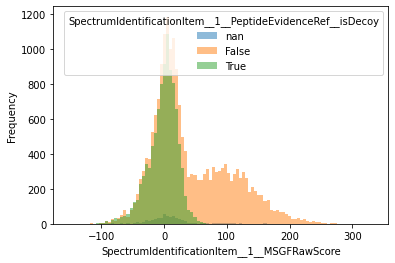

In [19]:
plot_values_by_class(df, value_col=RAW_SCORE, class_col=IS_DECOY)

### Weird Findings: There are NA values in the first isDecoy column

In [20]:
df[IS_DECOY].dropna().value_counts() == df[IS_DECOY].value_counts()

False    True
True     True
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy, dtype: bool

In [21]:
df[IS_DECOY].fillna(value=-1).value_counts()

False    19181
True      9695
-1         571
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy, dtype: int64

In [22]:
df[df[IS_DECOY].fillna(value=-1) == -1].head(1).T

,24
index,2018
id,controllerType=0 controllerNumber=1 scan=2019
defaultArrayLength,33
MS1_spectrum,None
ms_level,2
positive_scan,
centroid_spectrum,
base_peak_mz,325.113
base_peak_intensity,49009.9
total_ion_current,138511


In [23]:
df[IS_DECOY].value_counts()

False    19181
True      9695
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy, dtype: int64

## Data Filtering

### Drop NA Decoys

In [24]:
df = df.dropna(subset=[IS_DECOY])

### FDR Filtering and Decoy Removal 

In [25]:
FDR_COLUMN = 'SpectrumIdentificationItem__1__MSGFQValue'

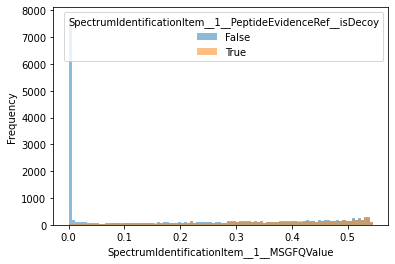

In [26]:
plot_values_by_class(df, value_col=FDR_COLUMN, class_col=IS_DECOY)

In [27]:
df[FDR_COLUMN].describe()

count    28876.000000
mean         0.242460
std          0.197164
min          0.000000
25%          0.000820
50%          0.259752
75%          0.430202
max          0.545079
Name: SpectrumIdentificationItem__1__MSGFQValue, dtype: float64

Deprecated approach: Calculating the False Discovery Rate based on the RawScore
```
# poor mens' FDR

# TODO find a way to directly achieve a specific FDR
def cutoff_decoys(df, decoy_ratio_to_keep=0.04, is_decoy_col=IS_DECOY, score_col=RAW_SCORE):
    decoys = df[df[is_decoy_col] == True]
    decoy_count = len(decoys)
    print(f"Number of Decoys: {decoy_count}")

    decoy_count_to_filter_out = decoy_count * (1-decoy_ratio_to_keep)
    decoy_count_to_filter_out = round(decoy_count_to_filter_out)
    print(f"Number of Decoys to definitely remove: {decoy_count_to_filter_out}")

    decoys_to_remove = decoys.sort_values(score_col, ascending=True).head(decoy_count_to_filter_out)
    lower_limit_score = decoys_to_remove[score_col].max()
    print(f"Lower score limit for keeping values: {lower_limit_score}")

    length_before_score_filtering = len(df)
    df = df[df[score_col] > lower_limit_score]
    length_after_score_filtering = len(df)
    print(f"Number of removed entries: {length_before_score_filtering - length_after_score_filtering}")

    fdr = df[is_decoy_col].value_counts()[True] / length_after_score_filtering
    print(f"False discovery rate (FDR): {fdr}")
    return df
```

In [28]:
def cutoff_decoys(df, fdr=0.01):
    filtered_df = df[df[FDR_COLUMN] < fdr]
    print(f"removed {len(df) - len(filtered_df)} of {len(df)} entries by filtering for FDR < {fdr}")
    return filtered_df

In [29]:
df = cutoff_decoys(df)

removed 20938 of 28876 entries by filtering for FDR < 0.01


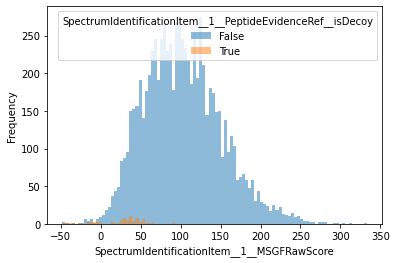

In [30]:
plot_values_by_class(df, value_col=RAW_SCORE, class_col=IS_DECOY)

In [31]:
decoy_counts = df[IS_DECOY].value_counts()
print(f"False Discovery Rate (FDR) as Decoys/Targets: {decoy_counts[True] / decoy_counts[False]}")
decoy_counts

False Discovery Rate (FDR) as Decoys/Targets: 0.009153318077803204


False    7866
True       72
Name: SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy, dtype: int64

In [32]:
# filter out Decoys
df = df[~df['SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy'].astype(bool)]

In [33]:
len(df)

7866

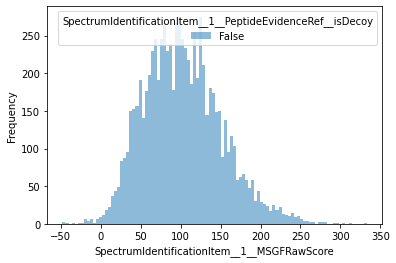

In [34]:
plot_values_by_class(df, value_col=RAW_SCORE, class_col=IS_DECOY)

## Data Enrichment

In [35]:
import wget
from openpyxl import load_workbook
import os

In [36]:
# taken from https://www.biorxiv.org/content/10.1101/428334v2.supplementary-material
SPECIES_MAPPING_FILE_DOWNLOAD_URL = 'https://www.biorxiv.org/highwire/filestream/128716/field_highwire_adjunct_files/1/428334-2.xlsx'
SPECIES_MAPPING_FILE_PATH = os.path.join(DUMP_PATH, 'file_to_species_mapping.xlsx')

In [37]:
if os.path.exists(SPECIES_MAPPING_FILE_PATH):
    print(f"skipping, because '{SPECIES_MAPPING_FILE_PATH}' already exists")
else:
    print(wget.download(SPECIES_MAPPING_FILE_DOWNLOAD_URL, out=SPECIES_MAPPING_FILE_PATH))

skipping, because '../dumps/PXD010000/file_to_species_mapping.xlsx' already exists


In [38]:
wb = load_workbook(SPECIES_MAPPING_FILE_PATH)
wb

In [39]:
wb.worksheets

[<Worksheet "mgf_list_v3">]

In [40]:
wb.worksheets[0].title

'mgf_list_v3'

In [41]:
ws = wb[wb.worksheets[0].title]
ws

<Worksheet "mgf_list_v3">

In [42]:
species_mapping_data = ws.values
species_mapping_columns = next(species_mapping_data)[0:]
species_mapping_df = pd.DataFrame(data=species_mapping_data, columns=species_mapping_columns)
species_mapping_df

,id,mgf_file,species,num_PSM,istrain
0,0,Biodiversity_A_cryptum_FeTSB_anaerobic_1_01Jun16_Pippin_16-03-39,Acidiphilium_cryptum_JF-5,6659,Train
1,1,Biodiversity_A_cryptum_FeTSB_anaerobic_2_01Jun16_Pippin_16-03-39,Acidiphilium_cryptum_JF-5,8532,Train
2,2,Biodiversity_A_cryptum_FeTSB_anaerobic_3_01Jun16_Pippin_16-03-39,Acidiphilium_cryptum_JF-5,7379,Train
3,3,Biodiversity_A_faecalis_LB_aerobic_01_26Feb16_Arwen_16-01-01,Alcaligenes_faecalis,15496,Train
4,4,Biodiversity_A_faecalis_LB_aerobic_02_26Feb16_Arwen_16-01-01,Alcaligenes_faecalis,15367,Train
5,5,Biodiversity_A_faecalis_LB_aerobic_03_26Feb16_Arwen_16-01-01,Alcaligenes_faecalis,15035,Train
6,6,Biodiversity_A_tumefaciens_R2A_aerobic_1_23Nov16_Pippin_16-09-11,Agrobacterium_tumefaciens_IAM_12048,12994,Train
7,7,Biodiversity_A_tumefaciens_R2A_aerobic_2_23Nov16_Pippin_16-09-11,Agrobacterium_tumefaciens_IAM_12048,12442,Train
8,8,Biodiversity_A_tumefaciens_R2A_aerobic_3_23Nov16_Pippin_16-09-11,Agrobacterium_tumefaciens_IAM_12048,11916,Train
9,9,Biodiversity_B_bifidum_CMcarb_anaerobic_01_26Feb16_Arwen_16-01-01,Bifidobacterium_bifidum_ATCC29521,14409,Train


In [43]:
del ws
del wb

In [44]:
species_mapping_df = species_mapping_df.drop(columns='id')

In [45]:
species_mapping_df = species_mapping_df.set_index('mgf_file')

In [46]:
species_mapping_df.head(1)

,species,num_PSM,istrain
mgf_file,,,
Biodiversity_A_cryptum_FeTSB_anaerobic_1_01Jun16_Pippin_16-03-39,Acidiphilium_cryptum_JF-5,6659,Train


In [47]:
df['mgf_file'] = df.mzml_filename.str.slice(stop=-5)
df.head(1)

,index,id,defaultArrayLength,MS1_spectrum,ms_level,positive_scan,centroid_spectrum,base_peak_mz,base_peak_intensity,total_ion_current,lowest_observed_mz,highest_observed_mz,count,mz_array,intensity_array,scanList__count,scanList__no_combination,scanList__scan__scan_start_time,scanList__scan__filter_string,scanList__scan__preset_scan_configuration,scanList__scan__ion_injection_time,scanList__scan__scanWindowList__count,scanList__scan__scanWindowList__scanWindow__scan_window_lower_limit,scanList__scan__scanWindowList__scanWindow__scan_window_upper_limit,MSn_spectrum,precursorList__count,scanList__scan__Thermo_Trailer_ExtraMonoisotopic_MZ,precursorList__precursor__spectrumRef,precursorList__precursor__isolationWindow__isolation_window_target_mz,precursorList__precursor__isolationWindow__isolation_window_lower_offset,precursorList__precursor__isolationWindow__isolation_window_upper_offset,precursorList__precursor__selectedIonList__count,precursorList__precursor__activation__beamtype_collisioninduced_dissociation,precursorList__precursor__activation__collision_energy,precursorList__precursor__selectedIonList__selectedIon__selected_ion_mz,precursorList__precursor__selectedIonList__selectedIon__charge_state,precursorList__precursor__selectedIonList__selectedIon__peak_intensity,mzml_filename,spectrumID,scan_numbers,scan_start_time,location,name,FileFormat,SpectrumIDFormat,SpectrumIdentificationItem__1__passThreshold,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__AssumedDissociationMethod,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__post,SpectrumIdentificationItem__1__PeptideEvidenceRef__pre,SpectrumIdentificationItem__1__PeptideEvidenceRef__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__accession,SpectrumIdentificationItem__1__PeptideEvidenceRef__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__protein_description,SpectrumIdentificationItem__1__PeptideEvidenceRef__numDatabaseSequences,SpectrumIdentificationItem__1__PeptideEvidenceRef__location,SpectrumIdentificationItem__1__PeptideEvidenceRef__FileFormat,SpectrumIdentificationItem__1__PeptideEvidenceRef__DB_composition_targetdecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__decoy_DB_accession_regexp,SpectrumIdentificationItem__1__PeptideEvidenceRef__decoy_DB_type_reverse,SpectrumIdentificationItem__1__PeptideEvidenceRef__DatabaseName__ID_005061_A9F31275fasta,SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification__location,SpectrumIdentificationItem__1__Modification__name,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1_

In [48]:
df = df.join(species_mapping_df, on='mgf_file')
df.head(1).T

,28
index,2030
id,controllerType=0 controllerNumber=1 scan=2031
defaultArrayLength,60
MS1_spectrum,None
ms_level,2
positive_scan,
centroid_spectrum,
base_peak_mz,129.102
base_peak_intensity,12147.3
total_ion_current,95457.7


## Data Introspection

In [49]:
len(df[df.SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta > 0])

570

In [ ]:
df.SpectrumIdentificationItem__1__Modification__location

In [51]:
df.SpectrumIdentificationItem__1__Modification.value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[{'location': 9, 'monoisotopicMassDelta': 15.99491463, 'name': 'Oxidation'}, {'location': 12, 'monoisotopicMassDelta': 15.99491463, 'name': 'Oxidation'}]                                                                                1
[{'location': 6, 'monoisotopicMassDelta': 15.99491463, 'name': 'Oxidation'}, {'location': 9, 'monoisotopicMassDelta': 15.99491463, 'name': 'Oxidation'}]                                                                                 1
[{'location': 1, 'monoisotopicMassDelta': 15.99491463, 'name': 'Oxidation'}, {'location': 4, 'monoisotopicMassDelta': 15.99491463, 'name': 'Oxidation'}]                                                                                 1
[{'location': 1, 'monoisotopicMassDelta': 15.99491463, 'name': 'Oxidation'}, {'location': 4, 'monoisotopicMassDelta': 15.99491463, 'name': 'Oxidation'}]                                                                                 1
[{'location': 1, 'monoisotopicMassDelta': 15.99491463, 'name

In [50]:
# column 'SpectrumIdentificationItem__1__Modification' is filled with None's
df[df.SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta > 0]\
.SpectrumIdentificationItem__1__Modification.value_counts()

Series([], Name: SpectrumIdentificationItem__1__Modification, dtype: int64)

In [56]:
df[df.SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta > 0].head(1).T

,177
index,2305
id,controllerType=0 controllerNumber=1 scan=2306
defaultArrayLength,36
MS1_spectrum,None
ms_level,2
positive_scan,
centroid_spectrum,
base_peak_mz,129.102
base_peak_intensity,2987.93
total_ion_current,32063.4


In [64]:
df[df.SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta > 0][['SpectrumIdentificationItem__1__PeptideSequence', 'SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta']].head(10)

,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta
0,TTTPKKPNSAMR,15.994915
3,RGQVEGMESSR,15.994915
5,GQVEGMESSR,15.994915
11,VTENMVGHK,15.994915
76,ENMPKDNVER,15.994915
90,AGMGKSQEEEEKAVK,15.994915
93,AGMGKSQEEEEKAVK,15.994915
131,SAPMQPATTQK,15.994915
164,ENMPKDNVER,15.994915
165,MNAEAGACEDKKR,15.994915


In [78]:
df[df.SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta > 0].SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta.value_counts()

15.994915    1901
Name: SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta, dtype: int64

In [81]:
df[df.SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta.fillna(0) == 0].SpectrumIdentificationItem__1__PeptideSequence.str.count('M').value_counts()

0    16852
1     6297
2     1482
3      221
4       55
7       11
5       10
6        1
Name: SpectrumIdentificationItem__1__PeptideSequence, dtype: int64

In [79]:
df[df.SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta > 0].SpectrumIdentificationItem__1__PeptideSequence.str.count('M').value_counts()

1    1271
2     504
3      96
4      24
7       3
6       2
5       1
Name: SpectrumIdentificationItem__1__PeptideSequence, dtype: int64

In [66]:
# PeptideSequence and PeptideEvidenceRef__PeptideSequence are always the same
df[
    df.SpectrumIdentificationItem__1__PeptideSequence != 
    df.SpectrumIdentificationItem__1__PeptideEvidenceRef__PeptideSequence].head(10)

,index,id,defaultArrayLength,MS1_spectrum,ms_level,positive_scan,centroid_spectrum,base_peak_mz,base_peak_intensity,total_ion_current,lowest_observed_mz,highest_observed_mz,count,mz_array,intensity_array,scanList__no_combination,scanList__scan__scan_start_time,scanList__scan__filter_string,scanList__scan__preset_scan_configuration,scanList__scan__ion_injection_time,scanList__scan__scanWindowList__scanWindow__scan_window_lower_limit,scanList__scan__scanWindowList__scanWindow__scan_window_upper_limit,MSn_spectrum,scanList__scan__Thermo_Trailer_ExtraMonoisotopic_MZ,precursorList__precursor__spectrumRef,precursorList__precursor__isolationWindow__isolation_window_target_mz,precursorList__precursor__isolationWindow__isolation_window_lower_offset,precursorList__precursor__isolationWindow__isolation_window_upper_offset,precursorList__precursor__activation__beamtype_collisioninduced_dissociation,precursorList__precursor__activation__collision_energy,precursorList__precursor__selectedIonList__selectedIon__selected_ion_mz,precursorList__precursor__selectedIonList__selectedIon__charge_state,precursorList__precursor__selectedIonList__selectedIon__peak_intensity,mzml_filename,spectrumID,scan_numbers,location,name,FileFormat,SpectrumIDFormat,SpectrumIdentificationItem__1__passThreshold,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__AssumedDissociationMethod,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__post,SpectrumIdentificationItem__1__PeptideEvidenceRef__pre,SpectrumIdentificationItem__1__PeptideEvidenceRef__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__accession,SpectrumIdentificationItem__1__PeptideEvidenceRef__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__protein_description,SpectrumIdentificationItem__1__PeptideEvidenceRef__numDatabaseSequences,SpectrumIdentificationItem__1__PeptideEvidenceRef__DB_composition_targetdecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__decoy_DB_accession_regexp,SpectrumIdentificationItem__1__PeptideEvidenceRef__decoy_DB_type_reverse,SpectrumIdentificationItem__1__PeptideEvidenceRef__DatabaseName__ID_005334_236ED22Cfasta,SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification,SpectrumIdentificationItem__2__passThreshold,SpectrumIdentificationItem__2__rank,SpectrumIdentificationItem__2__calculatedMassToCharge,SpectrumIdentificationItem__2__experimentalMassToCharge,SpectrumIdentificationItem__2__chargeState,SpectrumIdentificationItem__2__MSGFRawScore,SpectrumId

In [82]:
mzid = mmproteo.utils.formats.read.read('../datasets/PXD010000/S_venezuelae_MYM_1_21Mar16_Arwen_16-01-03_msgfplus.mzid')
mzid.head(2)

INFO: Finished reading mzid file '../datasets/PXD010000/S_venezuelae_MYM_1_21Mar16_Arwen_16-01-03_msgfplus.mzid'


,spectrumID,scan_numbers,scan_start_time,location,name,FileFormat,SpectrumIDFormat,SpectrumIdentificationItem__1__chargeState,SpectrumIdentificationItem__1__experimentalMassToCharge,SpectrumIdentificationItem__1__calculatedMassToCharge,SpectrumIdentificationItem__1__rank,SpectrumIdentificationItem__1__passThreshold,SpectrumIdentificationItem__1__MSGFRawScore,SpectrumIdentificationItem__1__MSGFDeNovoScore,SpectrumIdentificationItem__1__MSGFSpecEValue,SpectrumIdentificationItem__1__MSGFEValue,SpectrumIdentificationItem__1__MSGFQValue,SpectrumIdentificationItem__1__MSGFPepQValue,SpectrumIdentificationItem__1__IsotopeError,SpectrumIdentificationItem__1__AssumedDissociationMethod,SpectrumIdentificationItem__1__ExplainedIonCurrentRatio,SpectrumIdentificationItem__1__NTermIonCurrentRatio,SpectrumIdentificationItem__1__CTermIonCurrentRatio,SpectrumIdentificationItem__1__MS2IonCurrent,SpectrumIdentificationItem__1__NumMatchedMainIons,SpectrumIdentificationItem__1__MeanErrorAll,SpectrumIdentificationItem__1__StdevErrorAll,SpectrumIdentificationItem__1__MeanErrorTop7,SpectrumIdentificationItem__1__StdevErrorTop7,SpectrumIdentificationItem__1__MeanRelErrorAll,SpectrumIdentificationItem__1__StdevRelErrorAll,SpectrumIdentificationItem__1__MeanRelErrorTop7,SpectrumIdentificationItem__1__StdevRelErrorTop7,SpectrumIdentificationItem__1__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__start,SpectrumIdentificationItem__1__PeptideEvidenceRef__end,SpectrumIdentificationItem__1__PeptideEvidenceRef__pre,SpectrumIdentificationItem__1__PeptideEvidenceRef__post,SpectrumIdentificationItem__1__PeptideEvidenceRef__isDecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__length,SpectrumIdentificationItem__1__PeptideEvidenceRef__accession,SpectrumIdentificationItem__1__PeptideEvidenceRef__protein_description,SpectrumIdentificationItem__1__PeptideEvidenceRef__numDatabaseSequences,SpectrumIdentificationItem__1__PeptideEvidenceRef__DB_composition_targetdecoy,SpectrumIdentificationItem__1__PeptideEvidenceRef__decoy_DB_accession_regexp,SpectrumIdentificationItem__1__PeptideEvidenceRef__decoy_DB_type_reverse,SpectrumIdentificationItem__1__PeptideEvidenceRef__PeptideSequence,SpectrumIdentificationItem__1__PeptideEvidenceRef__DatabaseName__ID_005864_E4CF7F56fasta,SpectrumIdentificationItem__1__PeptideEvidenceRef,SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification__monoisotopicMassDelta,SpectrumIdentificationItem__1__Modification,SpectrumIdentificationItem__1__PeptideEvidenceRef__Modification,SpectrumIdentificationItem__2__chargeState,SpectrumIdentificationItem__2__experimentalMassToCharge,SpectrumIdentificationItem__2__calculatedMassToCharge,SpectrumIdentificationItem__2__rank,SpectrumIdentificationItem__2__passThreshold,SpectrumIdentificationItem__2__MSGFRawScore,SpectrumIdentificationItem__2__MSGFDeNovoScore,SpectrumIdentificationItem__2__MSGFSpecEValue,SpectrumIdentificationItem__2__MSGFEValue,SpectrumIdentificationItem__2__MSGFQValue,SpectrumIdentificationItem__2__MSGFPepQValue,SpectrumIdentificationItem__2__IsotopeError,SpectrumIdentificationItem__2__AssumedDissociationMethod,SpectrumIdentificationItem__2__ExplainedIonCurrentRatio,SpectrumIdentificationItem__2__NTermIonCurrentRatio,SpectrumIdentificationItem__2__CTermIonCurrentRatio,SpectrumIdentificationItem__2__MS2IonCurrent,SpectrumIdentificationItem__2__NumMatchedMainIons,SpectrumIdentificationItem__2__MeanErrorAll,SpectrumIdentificationItem__2__StdevErrorAll,SpectrumIdentificationItem__2__MeanErrorTop7,SpectrumIdentificationItem__2__StdevErrorTop7,SpectrumIdentificationItem__2__MeanRelErrorAll,SpectrumIdentificationItem__2__StdevRelErrorAll,SpectrumIdentificationItem__2__MeanRelErrorTop7,SpectrumIdentificationItem__2__StdevRelErrorTop7,SpectrumIdentificationItem__2__PeptideSequence,SpectrumIdentificationItem__2__PeptideEvidenceRef__start,SpectrumIdentificationItem__2__PeptideEvidenceRef__end,SpectrumIdentif

In [83]:
mzid.head(1).T

,0
spectrumID,controllerType=0 controllerNumber=1 scan=43111
scan_numbers,43111
scan_start_time,72.8409
location,E:\DMS_WorkDir3\S_venezuelae_MYM_1_21Mar16_Arwen_16-01-03.mzML
name,S_venezuelae_MYM_1_21Mar16_Arwen_16-01-03.mzML
FileFormat,mzML file
SpectrumIDFormat,Thermo nativeID format
SpectrumIdentificationItem__1__chargeState,3
SpectrumIdentificationItem__1__experimentalMassToCharge,1339.02
SpectrumIdentificationItem__1__calculatedMassToCharge,1338.68


In [86]:
mzid[mzid.SpectrumIdentificationItem__1__Modification__monoisotopicMassDelta > 0].head(1).T

,157
spectrumID,controllerType=0 controllerNumber=1 scan=52517
scan_numbers,52517
scan_start_time,92.0256
location,E:\DMS_WorkDir3\S_venezuelae_MYM_1_21Mar16_Arwen_16-01-03.mzML
name,S_venezuelae_MYM_1_21Mar16_Arwen_16-01-03.mzML
FileFormat,mzML file
SpectrumIDFormat,Thermo nativeID format
SpectrumIdentificationItem__1__chargeState,3
SpectrumIdentificationItem__1__experimentalMassToCharge,1127.9
SpectrumIdentificationItem__1__calculatedMassToCharge,1127.55


## Data Limiting

In [50]:
TRAINING_COLUMNS = [
    'SpectrumIdentificationItem__1__PeptideEvidenceRef__PeptideSequence',
    'mz_array',
    'intensity_array',
    'species',
    'istrain'
]

In [51]:
reduced_df = df[TRAINING_COLUMNS]
reduced_df.head(1)

,SpectrumIdentificationItem__1__PeptideEvidenceRef__PeptideSequence,mz_array,intensity_array,species,istrain
0,TTTPKKPNSAMR,"[100.07641, 100.087074, 101.07137, 101.1077, 102.05501, 110.07133, 110.631386, 112.05055, 112.07596, 112.08711, 113.07111, 115.05069, 115.08657, 116.07058, 127.0866, 129.10239, 130.08636, 130.09476, 130.10594, 131.0815, 131.09012, 132.54994, 136.06177, 136.07571, 139.08629, 139.90489, 140.0708, 141.06584, 141.10217, 143.08157, 145.0981, 147.11227, 147.96593, 149.02304, 152.05658, 153.10185, 155.08127, 155.11765, 157.09727, 157.10991, 158.09113, 159.07635, 164.05647, 167.05591, 167.08096, 169.05196, 171.07687, 171.11266, 175.10767, 175.11974, 176.11064, 180.07697, 181.09694, 181.13272, 185.05566, 185.09209, 186.09564, 196.10736, 197.09218, 198.08804, 199.0704, 199.10811, 203.10245, 204.10599, 205.1368, 209.1289, 212.10365, 214.11859, 222.16032, 224.10338, 226.15494, 227.1583, 238.15607, 240.13449, 240.17038, 242.11392, 257.19702, 258.15533, 258.20068, 264.13522, 265.1653, 268.12894, 283.17685, 286.13928, 300.11865, 305.15933, 305.65024, 309.192, 312.04562, 314.16446, 321.8492, 327.2031, 327.5248, 327.8595, 329.19373, 336.19986, 337.64832, 343.18893, 346.16183, 346.5337, ...]","[1044.7223, 3649.1797, 1102.0496, 1357.6985, 844.1217, 4310.1567, 701.75555, 3388.4607, 14474.438, 3396.4175, 3271.5308, 785.9828, 3989.8667, 1080.443, 8620.463, 115111.52, 60642.484, 892.7931, 6232.6123, 1503.7406, 1695.8452, 621.4343, 8136.3633, 3622.0579, 3527.2075, 690.5978, 3141.1062, 9701.572, 1072.0393, 4542.582, 913.5738, 1275.7793, 904.80707, 1183.5809, 1307.1254, 3257.456, 6890.353, 782.2476, 22261.06, 948.4679, 1374.1157, 8412.553, 1015.7166, 942.1996, 4452.6733, 818.5687, 7237.765, 11416.154, 45089.855, 7394.4355, 1465.4384, 3969.8708, 1652.0625, 1171.807, 927.53595, 48796.72, 3459.731, 1612.3837, 884.8939, 1009.1056, 948.3301, 5930.4526, 20944.246, 1297.6293, 876.90686, 699.8927, 2823.239, 4986.422, 1002.72095, 6868.054, 48777.496, 5358.242, 1159.44, 6050.066, 1177.8954, 4301.8447, 13318.132, 1678.9065, 896.4516, 1518.1096, 1104.4894, 3720.5735, 1503.6326, 7302.4346, 1507.2914, 853.93396, 1312.6992, 4806.0015, 1169.0146, 3889.657, 1483.5475, 3854.5623, 6731.8696, 3342.8206, 5410.943, 1120.8875, 888.22064, 883.156, 4437.399, 1748.3259, ...]",Bacteroides_fragilis_638R,Train


## Data Dumping

In [52]:
current_output_file_path = TRAINING_COLUMNS_DUMP_PATH + current_input_file_path[len(DATA_PATH):]
current_output_file_path

'../dumps/PXD010000/training_columns/Biodiversity_B_fragilis_01_28Jul15_Arwen_14-12-03_mzmlid.parquet'

In [53]:
#df.to_parquet(current_output_file_path)